In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

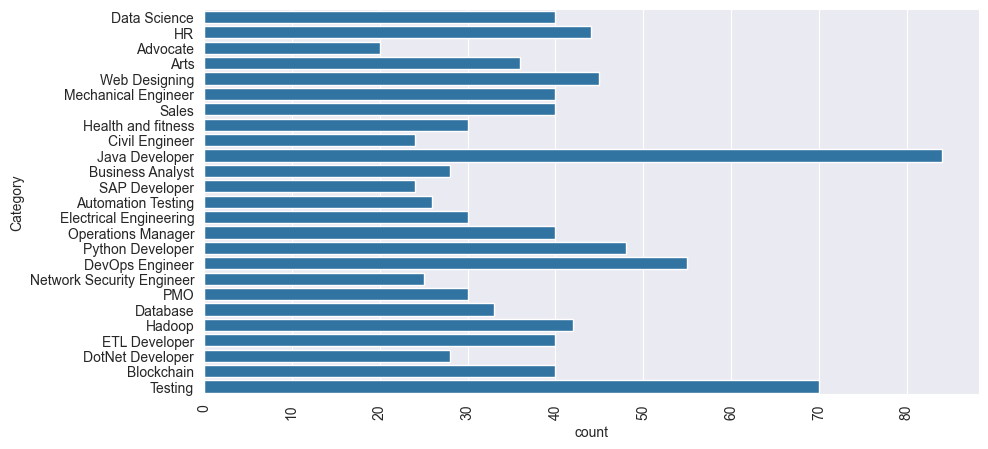

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [14]:
counts = df['Category'].value_counts()

In [15]:
labels = df['Category'].unique()

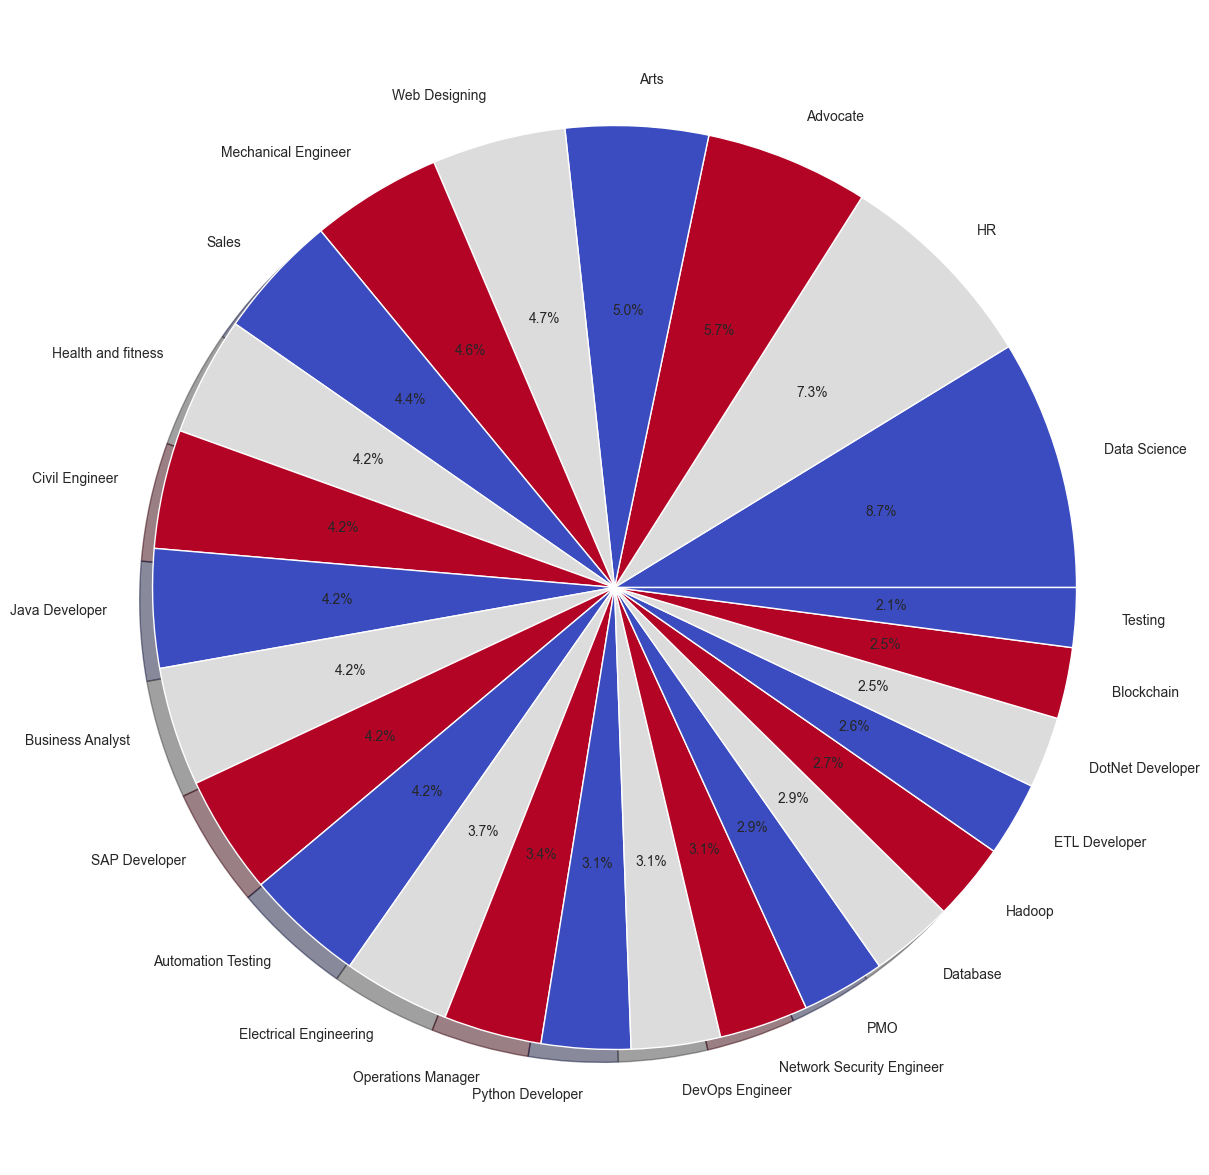

In [19]:
plt.figure(figsize=(20,15))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=plt.cm.coolwarm(np.linspace(0, 1, 3)))
plt.show()

In [20]:
df['Category'][0]

'Data Science'

In [22]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning data

In [23]:
import re

In [32]:
def clean_text(text):
    cleaned_text = re.sub('http\S+\s', ' ', text)
    cleaned_text = re.sub('RT|cc', ' ', cleaned_text)
    cleaned_text = re.sub('#\S+\s', '', cleaned_text)
    cleaned_text = re.sub('@\S+', ' ', cleaned_text)
    cleaned_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\x00-\x7F]', ' ', cleaned_text)
    cleaned_text = re.sub('\s+', ' ', cleaned_text)
    return cleaned_text

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASF\AppData\Local\Temp\ipykernel_20860\4253381419.py:2: SyntaxWarning: invalid escape sequence '\S'
  cleaned_text = re.sub('http\S+\s', ' ', text)
C:\Users\ASF\AppData\Local\Temp\ipykernel_20860\4253381419.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleaned_text = re.sub('#\S+\s', '', cleaned_text)
C:\Users\ASF\AppData\Local\Temp\ipykernel_20860\4253381419.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleaned_text = re.sub('@\S+', ' ', cleaned_text)
C:\Users\ASF\AppData\L

In [34]:
txt = "The yann's website http://yann.fk6.com is wrong"
cl_text = clean_text(txt)
print(cl_text)

The yann s website is wrong


In [35]:
df['Resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [36]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

## Words in categorical values

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df['Category'] = le.fit_transform(df['Category'])

In [39]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

## Vectorization

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

requiredtext = tfidf.fit_transform(df['Resume'])

## Splitting

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = requiredtext
y = df['Category']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.shape, X_test.shape

((769, 7363), (193, 7363))

## Model training

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

In [50]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,n_jobs,None
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
y_pred = clf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [52]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(f"accuracy score: {acc_score}")

accuracy score: 0.9844559585492227


In [53]:
import joblib

In [54]:
joblib.dump(clf, '../models/clf_model.pkl')

['../models/clf_model.pkl']

In [55]:
joblib.dump(tfidf, '../models/tfidf_model.pkl')

['../models/tfidf_model.pkl']

## Testing

In [58]:
# Python
numbers = [6, 12, 0, 1, 24, 16, 22, 14, 5, 15, 4, 21, 2, 11, 18, 20, 8, 17, 19, 7, 13, 10, 9, 3, 23]

labels = [
    'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
    'Mechanical Engineer', 'Sales', 'Health and fitness',
    'Civil Engineer', 'Java Developer', 'Business Analyst',
    'SAP Developer', 'Automation Testing', 'Electrical Engineering',
    'Operations Manager', 'Python Developer', 'DevOps Engineer',
    'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
    'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'
]

result_dict = {num: label for num, label in zip(numbers, labels)}

print(result_dict)

{6: 'Data Science', 12: 'HR', 0: 'Advocate', 1: 'Arts', 24: 'Web Designing', 16: 'Mechanical Engineer', 22: 'Sales', 14: 'Health and fitness', 5: 'Civil Engineer', 15: 'Java Developer', 4: 'Business Analyst', 21: 'SAP Developer', 2: 'Automation Testing', 11: 'Electrical Engineering', 18: 'Operations Manager', 20: 'Python Developer', 8: 'DevOps Engineer', 17: 'Network Security Engineer', 19: 'PMO', 7: 'Database', 13: 'Hadoop', 10: 'ETL Developer', 9: 'DotNet Developer', 3: 'Blockchain', 23: 'Testing'}


In [60]:
clf_model = joblib.load('../models/clf_model.pkl')
tfidf_model = joblib.load('../models/tfidf_model.pkl')

resume_txt = 'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'

cleaned_txt = clean_text(resume_txt)
clean_txt_vector = tfidf_model.transform([cleaned_txt])

y_pred_clf = clf_model.predict(clean_txt_vector)
pred = result_dict[y_pred_clf[0]]
print(pred)

Data Science
